<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/atividade6_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split # dividir dados em treino e teste
from sklearn.naive_bayes import GaussianNB # neive bayes
from sklearn.preprocessing import LabelEncoder # fazer o enconding
from sklearn.metrics import confusion_matrix, accuracy_score # criar a matriz de confusão
from yellowbrick.classifier import ConfusionMatrix # criar a matriz de confusão de forma grafica
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
dados = pd.read_csv('dados.csv')
dados.shape

(16, 4)

In [4]:
dados.head() #vizualizar

,popcorn,soda,candy,classe
0,24.3,750.7,0.2,ama
1,28.2,533.2,50.5,ama
2,26.7,642.3,15.8,ama
3,22.9,705.1,5.3,ama
4,29.1,589.4,42.1,ama


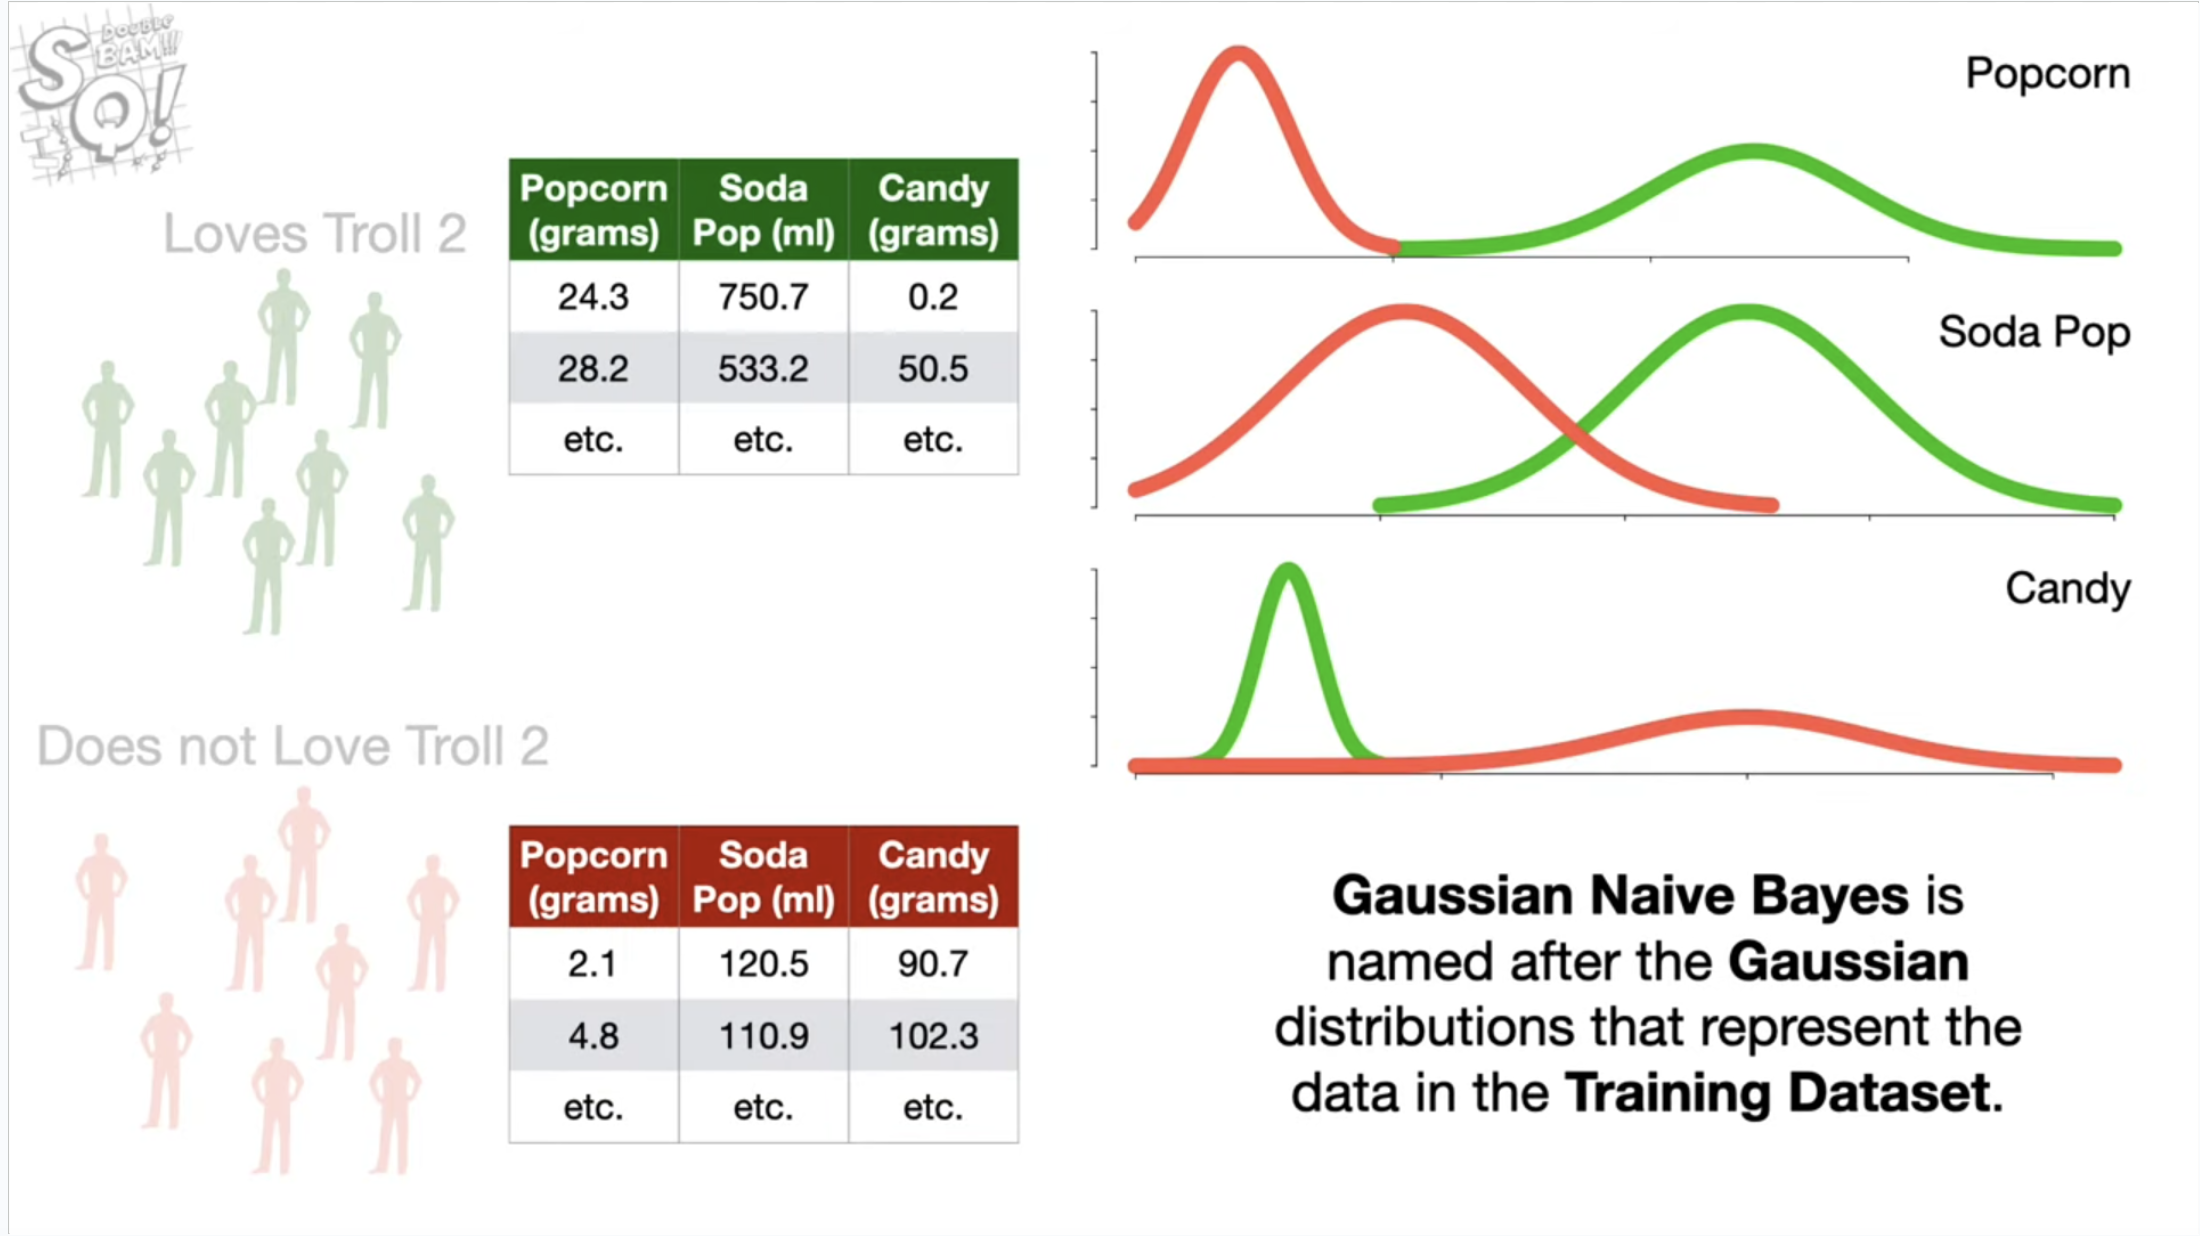

In [9]:
previsores = dados.iloc[:, 0:3].values # divide os pevisores da classe
previsores


array([[2.430e+01, 7.507e+02, 2.000e-01],
       [2.820e+01, 5.332e+02, 5.050e+01],
       [2.670e+01, 6.423e+02, 1.580e+01],
       [2.290e+01, 7.051e+02, 5.300e+00],
       [2.910e+01, 5.894e+02, 4.210e+01],
       [2.550e+01, 6.778e+02, 2.840e+01],
       [2.380e+01, 6.125e+02, 3.370e+01],
       [2.740e+01, 7.289e+02, 8.900e+00],
       [2.100e+00, 1.205e+02, 9.070e+01],
       [4.800e+00, 1.109e+02, 1.023e+02],
       [3.500e+00, 1.452e+02, 8.540e+01],
       [2.800e+00, 1.327e+02, 9.890e+01],
       [4.200e+00, 1.283e+02, 8.820e+01],
       [3.900e+00, 1.156e+02, 1.058e+02],
       [2.400e+00, 1.428e+02, 9.250e+01],
       [4.500e+00, 1.384e+02, 8.760e+01]])

In [7]:
classe = dados.iloc[:, 3].values
classe

array(['ama', 'ama', 'ama', 'ama', 'ama', 'ama', 'ama', 'ama', 'nao ama',
       'nao ama', 'nao ama', 'nao ama', 'nao ama', 'nao ama', 'nao ama',
       'nao ama'], dtype=object)

In [10]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

x_teste

array([[ 28.2, 533.2,  50.5],
       [ 23.8, 612.5,  33.7],
       [  2.1, 120.5,  90.7],
       [  4.8, 110.9, 102.3],
       [  3.9, 115.6, 105.8]])

In [11]:
# criação e treinamento do modelo (gração da tabela de probabilidades)
# aqui quando criamos o modelo vamos usar os dados de treinamento e nao de teste
# variavel idependente e dependente
# com a chamada de fit ela gera o modelo
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB()

In [12]:
# previsões utilizando registros de teste
previsoes = naive_bayes.predict(x_teste) # ele preve
previsoes

array(['ama', 'ama', 'nao ama', 'nao ama', 'nao ama'], dtype='<U7')

In [13]:
# geracao da mariz de confusao e calculo de taca de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[2, 0],
       [0, 3]])

In [14]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto
# tem algo errado, superajustado

1.0

In [15]:
taxa_erro

0.0

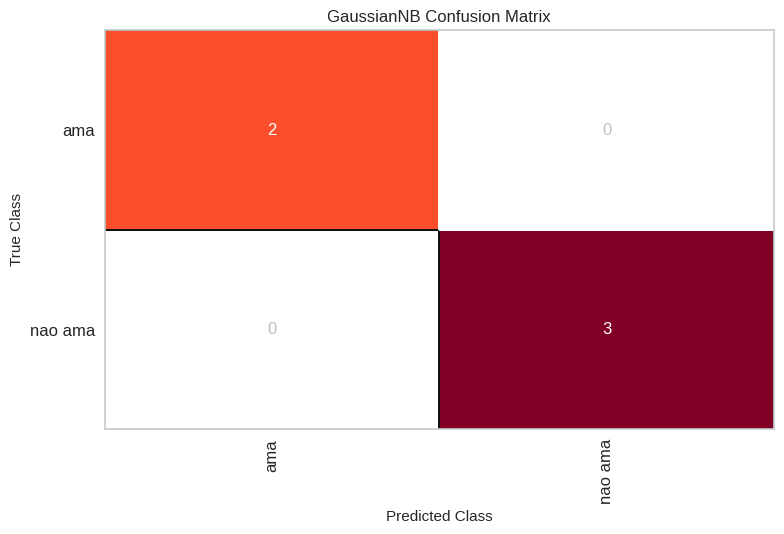

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [16]:
# visualizar a matriz de confusao
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

In [17]:
# Separando os dados por classe
dados_ama = dados[dados['classe'] == 'ama']
dados_nao_ama = dados[dados['classe'] == 'nao ama']

In [18]:
def plot_gaussian_distributions():
    plt.figure(figsize=(15, 10))
    features = ['popcorn', 'soda', 'candy']
    titles = ['Popcorn (grams)', 'Soda Pop (ml)', 'Candy (grams)']

    for i, (feature, title) in enumerate(zip(features, titles)):
        plt.subplot(3, 1, i+1)

        # Calculando médias e desvios
        mean_loves = dados_ama[feature].mean()
        std_loves = dados_ama[feature].std()
        mean_noloves = dados_nao_ama[feature].mean()
        std_noloves = dados_nao_ama[feature].std()

        # Pontos para as curvas
        if feature == 'popcorn':
            x = np.linspace(0, 35, 200)
        elif feature == 'soda':
            x = np.linspace(0, 800, 200)
        else:  # candy
            x = np.linspace(0, 120, 200)

        # Plotando distribuições normalizadas
        y_noloves = norm.pdf(x, mean_noloves, std_noloves)
        y_loves = norm.pdf(x, mean_loves, std_loves)

        # Normalizando para altura máxima 1
        y_noloves = y_noloves / np.max(y_noloves)
        y_loves = y_loves / np.max(y_loves)

        plt.plot(x, y_noloves, 'r-',
                label=f'Não ama (μ={mean_noloves:.1f}, σ={std_noloves:.1f})')
        plt.plot(x, y_loves, 'g-',
                label=f'Ama (μ={mean_loves:.1f}, σ={std_loves:.1f})')

        # Plotando pontos reais
        plt.plot(dados_nao_ama[feature], np.zeros_like(dados_nao_ama[feature]),
                'rx', alpha=0.5, label='Pontos reais (Não ama)')
        plt.plot(dados_ama[feature], np.zeros_like(dados_ama[feature]),
                'gx', alpha=0.5, label='Pontos reais (Ama)')

        plt.title(title)
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

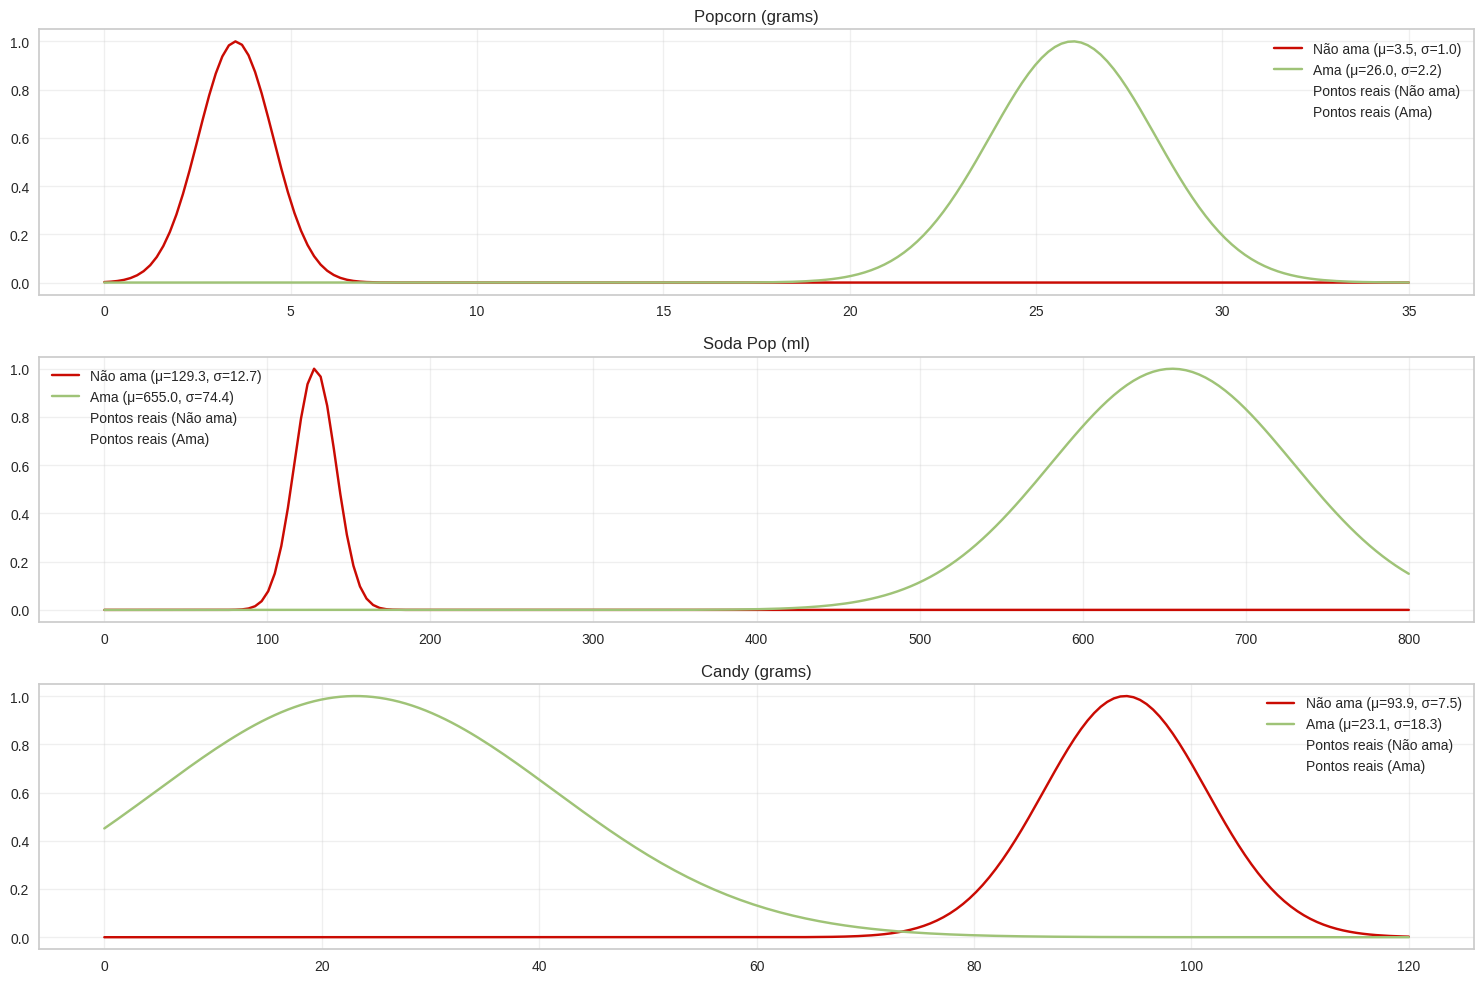

In [19]:
# Plotando as distribuições
plot_gaussian_distributions()

In [20]:
# Ponto de teste
test_point = np.array([20.0, 500.0, 25.0])
print("\nPonto de teste:", test_point)


Ponto de teste: [ 20. 500.  25.]


In [21]:
# Verificando os dados
print("Dados 'ama':")
print(dados_ama.describe())
print("\nDados 'não ama':")
print(dados_nao_ama.describe())

# Verificando se temos zeros ou valores muito próximos de zero
print("\nValores únicos em cada classe:")
for feature in ['popcorn', 'soda', 'candy']:
    print(f"\n{feature}:")
    print("Ama:", sorted(dados_ama[feature].unique()))
    print("Não ama:", sorted(dados_nao_ama[feature].unique()))

Dados 'ama':
         popcorn        soda      candy
count   8.000000    8.000000   8.000000
mean   25.987500  654.987500  23.112500
std     2.219677   74.407842  18.316225
min    22.900000  533.200000   0.200000
25%    24.175000  606.725000   8.000000
50%    26.100000  660.050000  22.100000
75%    27.600000  711.050000  35.800000
max    29.100000  750.700000  50.500000

Dados 'não ama':
        popcorn        soda       candy
count  8.000000    8.000000    8.000000
mean   3.525000  129.300000   93.925000
std    0.999643   12.728595    7.500429
min    2.100000  110.900000   85.400000
25%    2.700000  119.275000   88.050000
50%    3.700000  130.500000   91.600000
75%    4.275000  139.500000   99.750000
max    4.800000  145.200000  105.800000

Valores únicos em cada classe:

popcorn:
Ama: [22.9, 23.8, 24.3, 25.5, 26.7, 27.4, 28.2, 29.1]
Não ama: [2.1, 2.4, 2.8, 3.5, 3.9, 4.2, 4.5, 4.8]

soda:
Ama: [533.2, 589.4, 612.5, 642.3, 677.8, 705.1, 728.9, 750.7]
Não ama: [110.9, 115.6, 120.5, 128

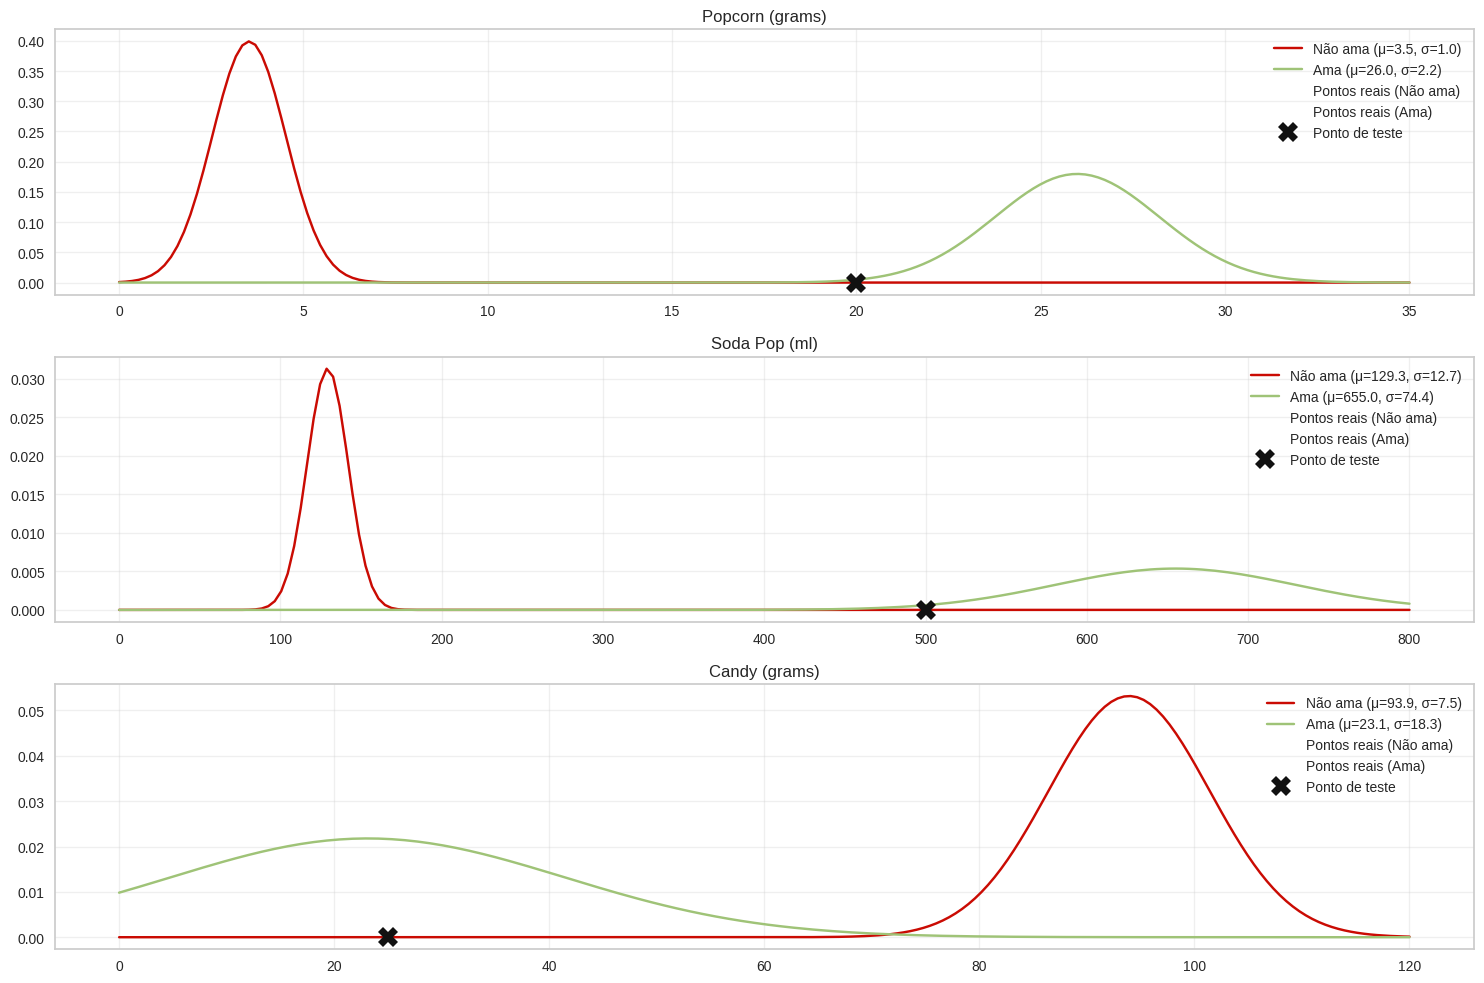

In [22]:
def plot_gaussian_distributions(test_point):
    plt.figure(figsize=(15, 10))
    features = ['popcorn', 'soda', 'candy']
    titles = ['Popcorn (grams)', 'Soda Pop (ml)', 'Candy (grams)']

    for i, (feature, title) in enumerate(zip(features, titles)):
        plt.subplot(3, 1, i+1)

        # Calculando médias e desvios
        mean_loves = dados_ama[feature].mean()
        std_loves = dados_ama[feature].std()
        mean_noloves = dados_nao_ama[feature].mean()
        std_noloves = dados_nao_ama[feature].std()

        # Pontos para as curvas
        if feature == 'popcorn':
            x = np.linspace(0, 35, 200)
        elif feature == 'soda':
            x = np.linspace(0, 800, 200)
        else:  # candy
            x = np.linspace(0, 120, 200)

        # Plotando distribuições
        plt.plot(x, norm.pdf(x, mean_noloves, std_noloves), 'r-',
                label=f'Não ama (μ={mean_noloves:.1f}, σ={std_noloves:.1f})')
        plt.plot(x, norm.pdf(x, mean_loves, std_loves), 'g-',
                label=f'Ama (μ={mean_loves:.1f}, σ={std_loves:.1f})')

        # Plotando pontos reais
        plt.plot(dados_nao_ama[feature], np.zeros_like(dados_nao_ama[feature]),
                'rx', alpha=0.5, label='Pontos reais (Não ama)')
        plt.plot(dados_ama[feature], np.zeros_like(dados_ama[feature]),
                'gx', alpha=0.5, label='Pontos reais (Ama)')
        # Plotando ponto de teste
        plt.plot(test_point[i], 0, 'kX', markersize=15, label='Ponto de teste')

        plt.title(title)
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plotando as distribuições com o ponto de teste
plot_gaussian_distributions(test_point)

In [24]:
def classify_troll2_lover(test_point):
    # Prior probabilities
    prior = np.log(0.5)
    print("\nCálculo detalhado das probabilidades:")

    features = ['popcorn', 'soda', 'candy']

    # Para Ama Troll 2
    print(f"\nPara Ama Troll 2:")
    print(f"log(Prior) = {prior:.2f}")

    score_ama = prior
    for i, feature in enumerate(features):
        mean = dados_ama[feature].mean()
        std = dados_ama[feature].std()
        likelihood = norm.pdf(test_point[i], mean, std)
        log_like = np.log(likelihood) if likelihood > 0 else -1000
        print(f"L({feature}|Ama) = {likelihood:.6f}")
        print(f"log(L({feature}|Ama)) = {log_like:.2f}")
        score_ama += log_like

    print(f"Score total Ama = {score_ama:.2f}")

    # Para Não Ama Troll 2
    print(f"\nPara Não Ama Troll 2:")
    print(f"log(Prior) = {prior:.2f}")

    score_nao_ama = prior
    for i, feature in enumerate(features):
        mean = dados_nao_ama[feature].mean()
        std = dados_nao_ama[feature].std()
        likelihood = norm.pdf(test_point[i], mean, std)
        log_like = np.log(likelihood) if likelihood > 0 else -1000
        print(f"L({feature}|Não Ama) = {likelihood:.6f}")
        print(f"log(L({feature}|Não Ama)) = {log_like:.2f}")
        score_nao_ama += log_like

    print(f"Score total Não Ama = {score_nao_ama:.2f}")

    print("\nComparações:")
    print("Predição manual:")
    if score_ama > score_nao_ama:
        result = "AMA Troll 2"
    else:
        result = "NÃO AMA Troll 2"
    print(f"O ponto de teste {result}")

    # Calculando probabilidades normalizadas
    prob_ama = np.exp(score_ama)
    prob_nao_ama = np.exp(score_nao_ama)
    total = prob_ama + prob_nao_ama

    print("\nProbabilidades normalizadas:")
    print(f"P(Ama|dados) = {prob_ama/total:.4f}")
    print(f"P(Não Ama|dados) = {prob_nao_ama/total:.4f}")

    return result



In [25]:
# Testando com o ponto de teste
test_point = [3, 130, 95]
result = classify_troll2_lover(test_point)


Cálculo detalhado das probabilidades:

Para Ama Troll 2:
log(Prior) = -0.69
L(popcorn|Ama) = 0.000000
log(L(popcorn|Ama)) = -55.34
L(soda|Ama) = 0.000000
log(L(soda|Ama)) = -30.12
L(candy|Ama) = 0.000010
log(L(candy|Ama)) = -11.53
Score total Ama = -97.68

Para Não Ama Troll 2:
log(Prior) = -0.69
L(popcorn|Não Ama) = 0.347673
log(L(popcorn|Não Ama)) = -1.06
L(soda|Não Ama) = 0.031295
log(L(soda|Não Ama)) = -3.46
L(candy|Não Ama) = 0.052646
log(L(candy|Não Ama)) = -2.94
Score total Não Ama = -8.16

Comparações:
Predição manual:
O ponto de teste NÃO AMA Troll 2

Probabilidades normalizadas:
P(Ama|dados) = 0.0000
P(Não Ama|dados) = 1.0000



# comando questao
Transforme o exemplo que inicia no slide 7 em código. Crie as tabelas para as três features a partir das distribuições reais usando médias e os desvios padrão dados nos slides. Plote essas distribuições em gráficos. No entanto, use os likelihoods dados nos exemplos para exemplificar em código a classificação.
Ao final, crie uma função na qual seja dada uma valores como na figura e ela retorne a classificação.


In [67]:
def classify_troll2_lover(popcorn, soda, candy):
    # Prior probabilities (do vídeo)
    prior = np.log(0.5)  # log(0.5) ≈ -0.69
    print("\nCálculo detalhado das probabilidades:")
    print(f"\nPara Ama Troll 2:")
    print(f"log(Prior) = {prior:.2f}")

    # Valores exatos do vídeo para Ama
    log_popcorn_ama = -2.8      # log(0.06)
    log_soda_ama = -5.5         # log(0.004)
    log_candy_ama = -115.0      # log do número muito pequeno

    score_ama = prior + log_popcorn_ama + log_soda_ama + log_candy_ama

    print(f"log(L(popcorn|Ama)) = {log_popcorn_ama:.2f}")
    print(f"log(L(soda|Ama)) = {log_soda_ama:.2f}")
    print(f"log(L(candy|Ama)) = {log_candy_ama:.2f}")
    print(f"Score total Ama = {score_ama:.2f}")

    # Valores exatos do vídeo para Não Ama
    print(f"\nPara Não Ama Troll 2:")
    print(f"log(Prior) = {prior:.2f}")

    log_popcorn_nao_ama = -48.0  # aproximado do vídeo
    log_soda_nao_ama = -48.0     # aproximado do vídeo
    log_candy_nao_ama = -3.9     # log(0.02)

    score_nao_ama = prior + log_popcorn_nao_ama + log_soda_nao_ama + log_candy_nao_ama

    print(f"log(L(popcorn|Não Ama)) = {log_popcorn_nao_ama:.2f}")
    print(f"log(L(soda|Não Ama)) = {log_soda_nao_ama:.2f}")
    print(f"log(L(candy|Não Ama)) = {log_candy_nao_ama:.2f}")
    print(f"Score total Não Ama = {score_nao_ama:.2f}")

    print("\nComparações:")
    print("Predição manual:")
    if score_ama > score_nao_ama:
        result = "AMA Troll 2"
    else:
        result = "NÃO AMA Troll 2"
    print(f"O ponto de teste {result}")

    return result

# Testando com os valores do vídeo
test_point = [20, 500, 25]
result = classify_troll2_lover(test_point[0], test_point[1], test_point[2])


Cálculo detalhado das probabilidades:

Para Ama Troll 2:
log(Prior) = -0.69
log(L(popcorn|Ama)) = -2.80
log(L(soda|Ama)) = -5.50
log(L(candy|Ama)) = -115.00
Score total Ama = -123.99

Para Não Ama Troll 2:
log(Prior) = -0.69
log(L(popcorn|Não Ama)) = -48.00
log(L(soda|Não Ama)) = -48.00
log(L(candy|Não Ama)) = -3.90
Score total Não Ama = -100.59

Comparações:
Predição manual:
O ponto de teste NÃO AMA Troll 2
